# Larry Sanders's Dream Home

Our client Mr. Larry Sanders, shares one of the biggest american dreams: he wants to buy a home. The wished location is King County - Washington. It is one of the healthiest Counties in the USA, where life expectancy reaches 82.3 years, way above national average. It is also a wealthy area, where median household income is also above national average, and reaches $122,148 per household.  (Source: https://datausa.io/).

Mr. Sanders has a limited budget, and wants a waterfront home. It has to be nice and isolated, but still within a central neighborhood. One important criteria is that the neighborhood should not have many kids, since Mr. Sanders prefers that his children does not interact with others (too many germs out there!)





### Summary of Client's Demands:
- Waterfront home
- Limited Budget
- Nice & Isolated Property
- Central Neighborhood
- No kids Neighborhood
- Bonus: Data about area cleaness 

### Working with the provided Data

For this client's analysis, we will be working with the King County Database. We will first import it, and then filter relevant information for our case. We will be also cleaning the Data, to make sure we have the best outcome possible through out analysis. 

In [186]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
# Import and manage data
df = pd.read_csv("../data/KingCounty_joinedTable.csv", sep=";")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

### Data Cleaning

In [188]:
# Data cleaning

#Checking for Duplicates
df.duplicated().value_counts()
#No Duplicates were found

#Transforming Date Column from Object to Date Format
df ['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")

#Checking for Data Types
df.dtypes
#All are integers and floats, except for Date (which was an object and is datetime now)

#Fill all nulls from the ye_renovated column with a 0 and cast them to an int
df["yr_renovated"] = df["yr_renovated"].fillna(0).round(0).astype(int)
#Cut a 5th number from the year if one exists 
df.yr_renovated = df.yr_renovated.apply(lambda x: int(str(x)[:4]))

#Replace all nulls of the data with a -1
df.fillna(-1, inplace=True)

df.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,-1.0,0.0,3,7,...,0,98178,47.5112,-122.25700,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1991,98125,47.7210,-122.31900,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0,98028,47.7379,-122.23300,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0,98136,47.5208,-122.39300,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.04500,1800.0,7503.0,2015-02-18,510000.0,1954400510,5
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,0,98053,47.6561,-122.00500,4760.0,101930.0,2014-05-12,1230000.0,7237550310,6
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,0,98003,47.3097,-122.32700,2238.0,6819.0,2014-06-27,257500.0,1321400060,7
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,-1.0,3,7,...,0,98198,47.4095,-122.31500,1650.0,9711.0,2015-01-15,291850.0,2008000270,8
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,0,98146,47.5123,-122.33700,1780.0,8113.0,2015-04-15,229500.0,2414600126,9
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0,98038,47.3684,-122.03100,2390.0,7570.0,2015-03-12,323000.0,3793500160,10


### Three Hypothesis (including one Geographical)

H1) If a Waterfront house is not renovated, the price is cheaper.
H2) If the purchase is done during winter months, it is likely that prices will be lower.
H3) Houses closer to central areas tend to have fewer bedrooms and smaller nearby houses, suggesting fewer families with children.

### H1: If a Waterfront house is not renovated, the price is cheaper.

renovated water home: 667  / not renovated: 2691
Renovated: 1684482.76$
Non Renovated: 1725327.78$
532.26 471.7


/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2408029070.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waterfront["renovation_status"] = df_waterfront["yr_renovated"].apply(
/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2408029070.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waterfront["price_per_sqrfoot"] = (df_waterfront.price / df_waterfront.sqft_living).round(2)
/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2408029070.py:35: F

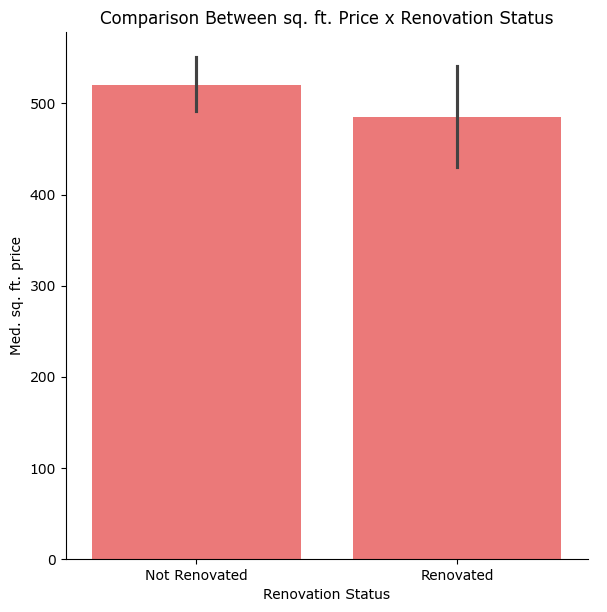

In [235]:
df_waterfront = df.query("waterfront > 0")
# df_waterfront.info()

df_waterfront_not_renovated = df_waterfront.query("yr_renovated <= 0")
# df_waterfront_not_renovated.info()
# 117 entries

df_waterfront_renovated = df_waterfront.query("yr_renovated > 0")
# df_waterfront_renovated.info()

renovated_count = df_waterfront_renovated.size
non_renovated_count = df_waterfront_not_renovated.size

# Waterview home that are renovated: 609  / not renovated: 2457
print("renovated water home: " + str(renovated_count), 
      " / not renovated: " + str(non_renovated_count))

#Renovated: 1684482.76$
#Non Renovated: 1752640.22$
print("Renovated: "+ str(df_waterfront_renovated.price.mean().round(2)) + "$")
print("Non Renovated: " +str(df_waterfront_not_renovated.price.mean().round(2)) + "$")

#Create new column to specify renovated and unrenovated houses
df_waterfront["renovation_status"] = df_waterfront["yr_renovated"].apply(
              lambda x: "Renovated" if x > 0 else "Not Renovated")

#Create column for price per sqrfoot
df_waterfront["price_per_sqrfoot"] = (df_waterfront.price / df_waterfront.sqft_living).round(2)

#Create new dataframe, groping houses by renovation status and calculate their avg price
#per sqr foot
price_by_renovation = df_waterfront.groupby('renovation_status')['price_per_sqrfoot'].median()
# df['renovation_status'] = df['column_name'].astype(str)
# median_values = df_waterfront.groupby('renovation_status')['price_per_sqft'].median()
print(price_by_renovation[0],price_by_renovation[1])
#nonren:532.26 ren:471.7
#Plot bar diagram to visualize the average sqr foot price for renovated/unrenotated
#waterview houses
g = sns.catplot(
    data=df_waterfront, kind="bar",
    x ="renovation_status", y = "price_per_sqrfoot",
    alpha = .6, height= 6, color = "red"
)

plt.xlabel("Renovation Status")
plt.ylabel("Med. sq. ft. price")
plt.rcParams['font.family'] = 'Verdana'
g.set(title="Comparison Between sq. ft. Price x Renovation Status")
plt.show()



### H2: If the purchase is done during winter months, it is likely that prices will be lower.

532.26 554.91 488.81 479.53


/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2132171609.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waterfront['date'] = pd.to_datetime(df_waterfront['date'],format="%Y-%m-%d")
/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2132171609.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waterfront["season"] = df_waterfront["date"].apply(get_season)
/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2132171609.py:21: FutureWarning: Series.__g

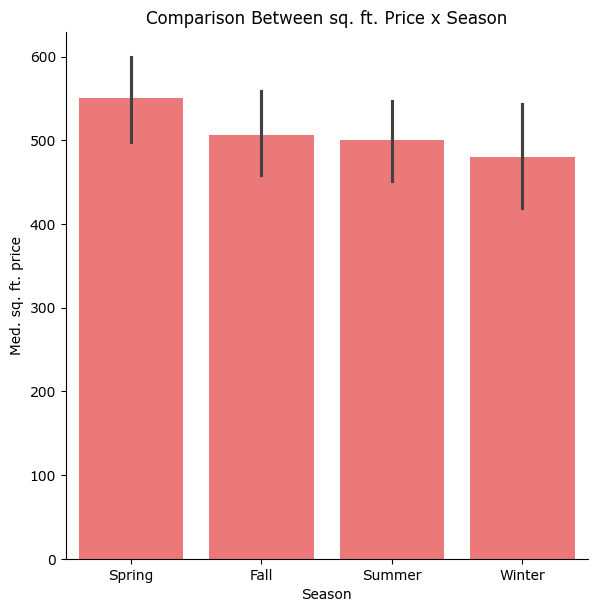

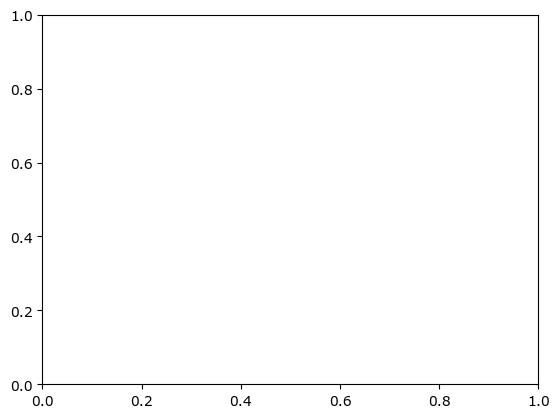

In [236]:
#Create function to get seasons by month from a date
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
#Fix type of date to be from type datetime instead of string
df_waterfront['date'] = pd.to_datetime(df_waterfront['date'],format="%Y-%m-%d")

#Create column for season
df_waterfront["season"] = df_waterfront["date"].apply(get_season)

#Create dataframe grouped by season and average sqr foot price
price_by_season = df_waterfront.groupby('season')['price_per_sqrfoot'].median()
print(price_by_season[0],price_by_season[1],price_by_season[2],price_by_season[3])

#Plot bar diagram to visualize the average sqr foot price per season
#for waterview houses
g = sns.catplot(
    data=df_waterfront, kind="bar",
    x ="season", y = "price_per_sqrfoot",
    alpha = .6, height= 6, color = "red"
)

plt.xlabel("Season")
plt.ylabel("Med. sq. ft. price")
plt.rcParams['font.family'] = 'Verdana'
plt.subplots(facecolor='none')
g.set(title="Comparison Between sq. ft. Price x Season")
plt.show()



### H3: Houses closer to central areas tend to have fewer bedrooms and smaller nearby houses, suggesting fewer families with children.

Central: 38   Not central: 2691


/var/folders/h_/0zjlvd5x2lq2bpdp5h5_2dvh0000gn/T/ipykernel_13690/2700845782.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waterfront["zip_category"] = df_waterfront["zipcode"].apply(get_central)


<Axes: ylabel='count'>

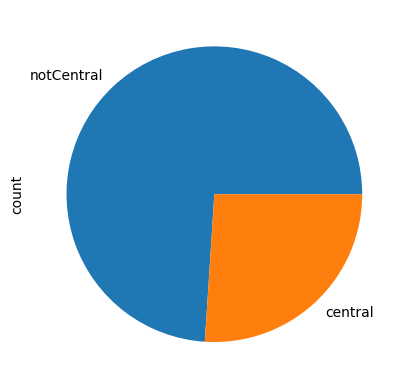

In [191]:
#Function that returns a string with the value "central" or "notCentral"
#if the passed argument which should represent a zipcode lies inside the 
#predefined list or not
central_zip_codes = [98101,98102,98103,98104, 
                     98105,98106,98107,98108,
                     98109,98112,98115,98116,
                     98117,98118,98119,98121,
                     98122,98125,98126,98133,
                     98134,98136,98144,98146,
                     98154,98164,98174,98177,
                     98178,98195,98199]

def get_central(zipCode):
    if zipCode in central_zip_codes:
        return "central"
    else:
        return "notCentral"

#Create new column and categorize it to cental/non central waterfront homes
#based on their zip code
df_waterfront["zip_category"] = df_waterfront["zipcode"].apply(get_central)

#Clean out some columns we dont need for now
df_cleaned_waterfront = df_waterfront.copy()
# df_cleaned_waterfront.drop("sqft_lot", axis=1,inplace=True)
# df_cleaned_waterfront.drop("condition", axis=1,inplace=True)
# df_cleaned_waterfront.drop("grade", axis=1,inplace=True)
df_cleaned_waterfront.drop("bathrooms", axis=1,inplace=True)
df_cleaned_waterfront.drop("sqft_above", axis=1,inplace=True)
df_cleaned_waterfront.drop("sqft_basement", axis=1,inplace=True)
# df_cleaned_waterfront.drop("view", axis=1,inplace=True)

#Count the central and non central waterfront houses from the cleaned table
central_count = df_cleaned_waterfront['zip_category'].value_counts().get('central', 0)
not_central_count = df_cleaned_waterfront['zip_category'].value_counts().get('notCentral', 0)
print("Central:",central_count," ", "Not central:",non_renovated_count)
#Central: 38   Not central: 2691

#Plot pie chart of central, non central water housing distribution 
df_cleaned_waterfront.zip_category.value_counts().plot(kind="pie")


count    146.000000
mean       3.349315
std        1.099169
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: bedrooms, dtype: float64


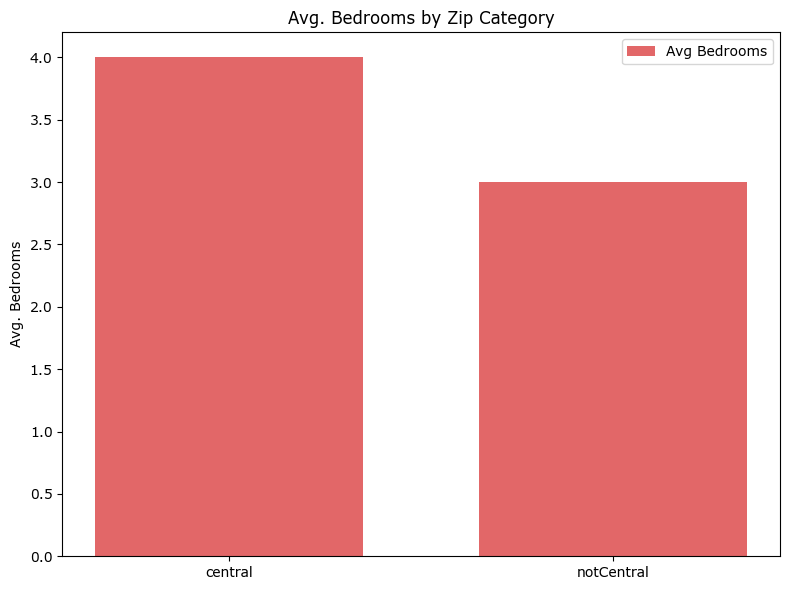

In [247]:
#Create dataframes for central and non central homes
df_cleaned_waterfront["zip_category"] = df_cleaned_waterfront["zip_category"].astype("string")
df_cleaned_waterfront.dtypes
# df_waterfront_cental = df_cleaned_waterfront[df_cleaned_waterfront["zip_category"] == "central"]
# df_waterfront_cental = df_cleaned_waterfront[df_cleaned_waterfront["zip_category"] == "central"]
bedroms_per_zipCategory = df_cleaned_waterfront.groupby('zip_category')['bedrooms'].mean()
df_cleaned_waterfront.head(2)
# #Plot bar diagram to visualize the average sqr foot price per season
# #for waterview houses
# g = sns.catplot(
#     data=df_waterfront, kind="bar",
#     x ="zip_category", y = "bedrooms",
#     alpha = .6, height= 6
# )

# plt.xlabel("zip_category")
# plt.ylabel("Avg. bedrooms")
# g.set(title="Comparison Between zip_category bedrooms x zip_category")
# plt.show()

print(df_cleaned_waterfront.bedrooms.describe())
df_cleaned_waterfront.price_per_sqrfoot.describe()

#Group and aggregate
agg_data = df_cleaned_waterfront.groupby('zip_category').agg({
    'bedrooms': 'median',
    'price_per_sqrfoot': 'median'
}).reset_index()

# Setup
categories = agg_data['zip_category']
bedrooms = agg_data['bedrooms']
price_sqft = agg_data['price_per_sqrfoot']

# x = np.arange(len(categories))  # the label locations
# width = 0.35  # width of the bars

# # Plot
# fig, ax1 = plt.subplots(figsize=(8,6))

# bar1 = ax1.bar(x - width/2, bedrooms, width, label='Avg Bedrooms', color='skyblue')
# bar2 = ax1.bar(x + width/2, price_sqft, width, label='Price per Sqft', color='salmon')

# # Labels and title
# ax1.set_xlabel('Zip Category')
# ax1.set_ylabel('Value')
# ax1.set_title('Average Bedrooms and Price per Sqft by Zip Category')
# ax1.set_xticks(x)
# ax1.set_xticklabels(categories)
# ax1.legend()

# plt.show()
#_____________
# fig, ax1 = plt.subplots(figsize=(8,6))

# # Plot avg bedrooms
# color = 'tab:blue'
# ax1.set_xlabel('Zip Category')
# ax1.set_ylabel('Avg Bedrooms', color=color)
# ax1.bar(categories, bedrooms, color=color, alpha=0.6, label='Avg Bedrooms')
# ax1.tick_params(axis='y', labelcolor=color)

# # Secondary Y-axis for price per sqft
# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Price per Sqft', color=color)
# ax2.plot(categories, price_sqft, color=color, marker='o', label='Price per Sqft')
# ax2.tick_params(axis='y', labelcolor=color)

# # Title
# plt.title('Avg Bedrooms and Price per Sqft by Zip Category')
# plt.show()

#________________________________

# fig, ax = plt.subplots(figsize=(8,6))

# # Bar positions
# x = np.arange(len(categories))
# width = 0.35

# # Normalize price per sqft for visual comparison
# price_sqft_scaled = price_sqft / price_sqft.max() * bedrooms.max()

# # Bars for bedrooms
# ax.bar(x - width/2, bedrooms, width, label='Avg Bedrooms', color='tab:blue', alpha=0.7)

# # Bars for price per sqft
# ax.bar(x + width/2, price_sqft_scaled, width, label='Price per Sqft (scaled)', color='tab:red', alpha=0.7)

# # Labels and legend
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_ylabel('Avg Bedrooms')
# ax.set_title('Avg Bedrooms and Price per Sqft (scaled) by Zip Category')
# ax.legend()

# plt.show()

# Setup bar positions
x = np.arange(len(categories))
width = 0.7

# Scale price_sqft relative to bedrooms for side-by-side plotting
price_scaled = price_sqft / max(price_sqft) * max(bedrooms)

# Create figure
fig, ax = plt.subplots(figsize=(8,6),facecolor=('none'))

# Plot bars
# bars1 = ax.bar(x - width/2, bedrooms, width, label='Avg Bedrooms', color='tab:red', alpha=0.7)
bars1 = ax.bar(x, bedrooms, width, label='Avg Bedrooms', color='tab:red', alpha=0.7)
# bars2 = ax.bar(x + width/2, price_scaled, width, label='Price per Sqft (scaled)', color='#d9bb86', alpha=0.7)

# Annotate the actual price per sqft values on the red bars
# for idx, val in enumerate(price_sqft):
#     ax.text(x[idx] + width/2, price_scaled[idx] + 0.05, f"${val:.2f}", 
#             ha='center', va='bottom', color='#000000', fontsize=10, fontweight='bold')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Avg. Bedrooms')
ax.set_title('Avg. Bedrooms by Zip Category')
ax.legend()

plt.tight_layout()
plt.show()
